## Tutorial 3. Plot channel profiles

In this tutorial we will use the previously created Network object to create a channel for the main basin of jebja30 DEM. 

The **Channel** object allows to manipulate channels, plot different profiles, etc. There are different ways to extract individual channels from a network:

- Extract a single channel from a Network object by giving the coordinates of its head and mouth
- Extract multiple channels from a polyline shapefile with rivers
- Extract all channels in a basin by using BNetwork class

To run this tutorial in Jupyter, make sure that the "data" folder is inside the same folder of the notebook with the tutorial data. 

### 1. Load a previously created Network object

To load a previously created Network object (saved as *.dat file), simply call the Network class with the path as unique attribute

In [4]:
from landspy import Network

# Load a previously saved Network object. 
net = Network("data/guadalfeo_net800.dat")

### 2. Extract a single channel from a Network

We can extract a single channel from a Network object with the method `.getChannel()`

>- `Network.getChannel(head, mouth=None, name="", oid=-1):`
    - `head` (tuple) Tuple with the x and y coordinates of the head
    - `mouth` (tuple) Tuple with the x and y coordinates of the mouth. If None, channel will continue until the next outlet. 
    - `name` (str) Name (label) of the channel
    - `oid` (int) Id of the basin

Head and mouth points will be snapped to the closest channel cell. 
Once the channel is created we can use the following methods to retreive channel properties:

- `Channel.getXY()` >> Get a 2d numpy array with the X and Y coordinates of channel cells from head to mouth. 
- `Channel.getZ()` >> Get a 1d numpy array with cell elevations from head to mouth
-  `Channel.getD()` >> Get a 1d numpy array with cell distances to channel head (from head to mouth). 
- `Channel.getA()` >> Get a 1d numpy array with cell drainage area values (in cell units) from head (lower values) to mouth (higher values).
- `Channel.getChi()` >> Get a 1d numpy array with cell chi values from head (higher values) to mouth (lower values).
- `Channel.getKsn()` >> Get a 1d numpy array with cell ksn values from head to mouth.
- `Channel.getSlope()` >> Get a 1d numpy array with cell ksn values from head to mouth.
   
   Ksn and slope values are calculated in each cell by lineal regression using a moving window of n-pixels up- and downstream. they can be recalculated for the channel with the method `.calculateGradients(npoints, kind)`, being kind a string that identifies if slope ('slp') or ksn ('ksn') gradient is calculated. 
   
   For noisy DEMs, channel elevations can be smoothed by using a moving window with the method `.smoothChannel(winsize=0, recalculate_gradients=True)`
   
   Different kind of profiles can be plotted easily with matplotlib library. 
   

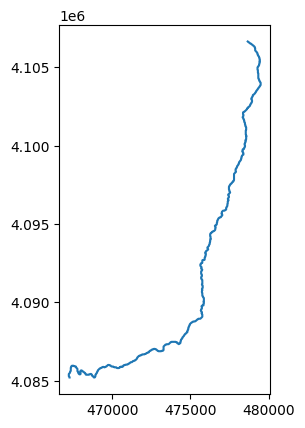

In [5]:
# We will extract the main channel of the Poqueira basin
# Head and mouth in DEM coordinate system
head = [478657, 4106647]
mouth = [467286, 4085195]

canal = net.getChannel(head, mouth, "Main Channel", 1)

# Get xy values and plot channel
import matplotlib.pyplot as plt

xy = canal.getXY()
fig, ax = plt.subplots()
ax.plot(xy[:,0], xy[:,1])
ax.set_aspect("equal")

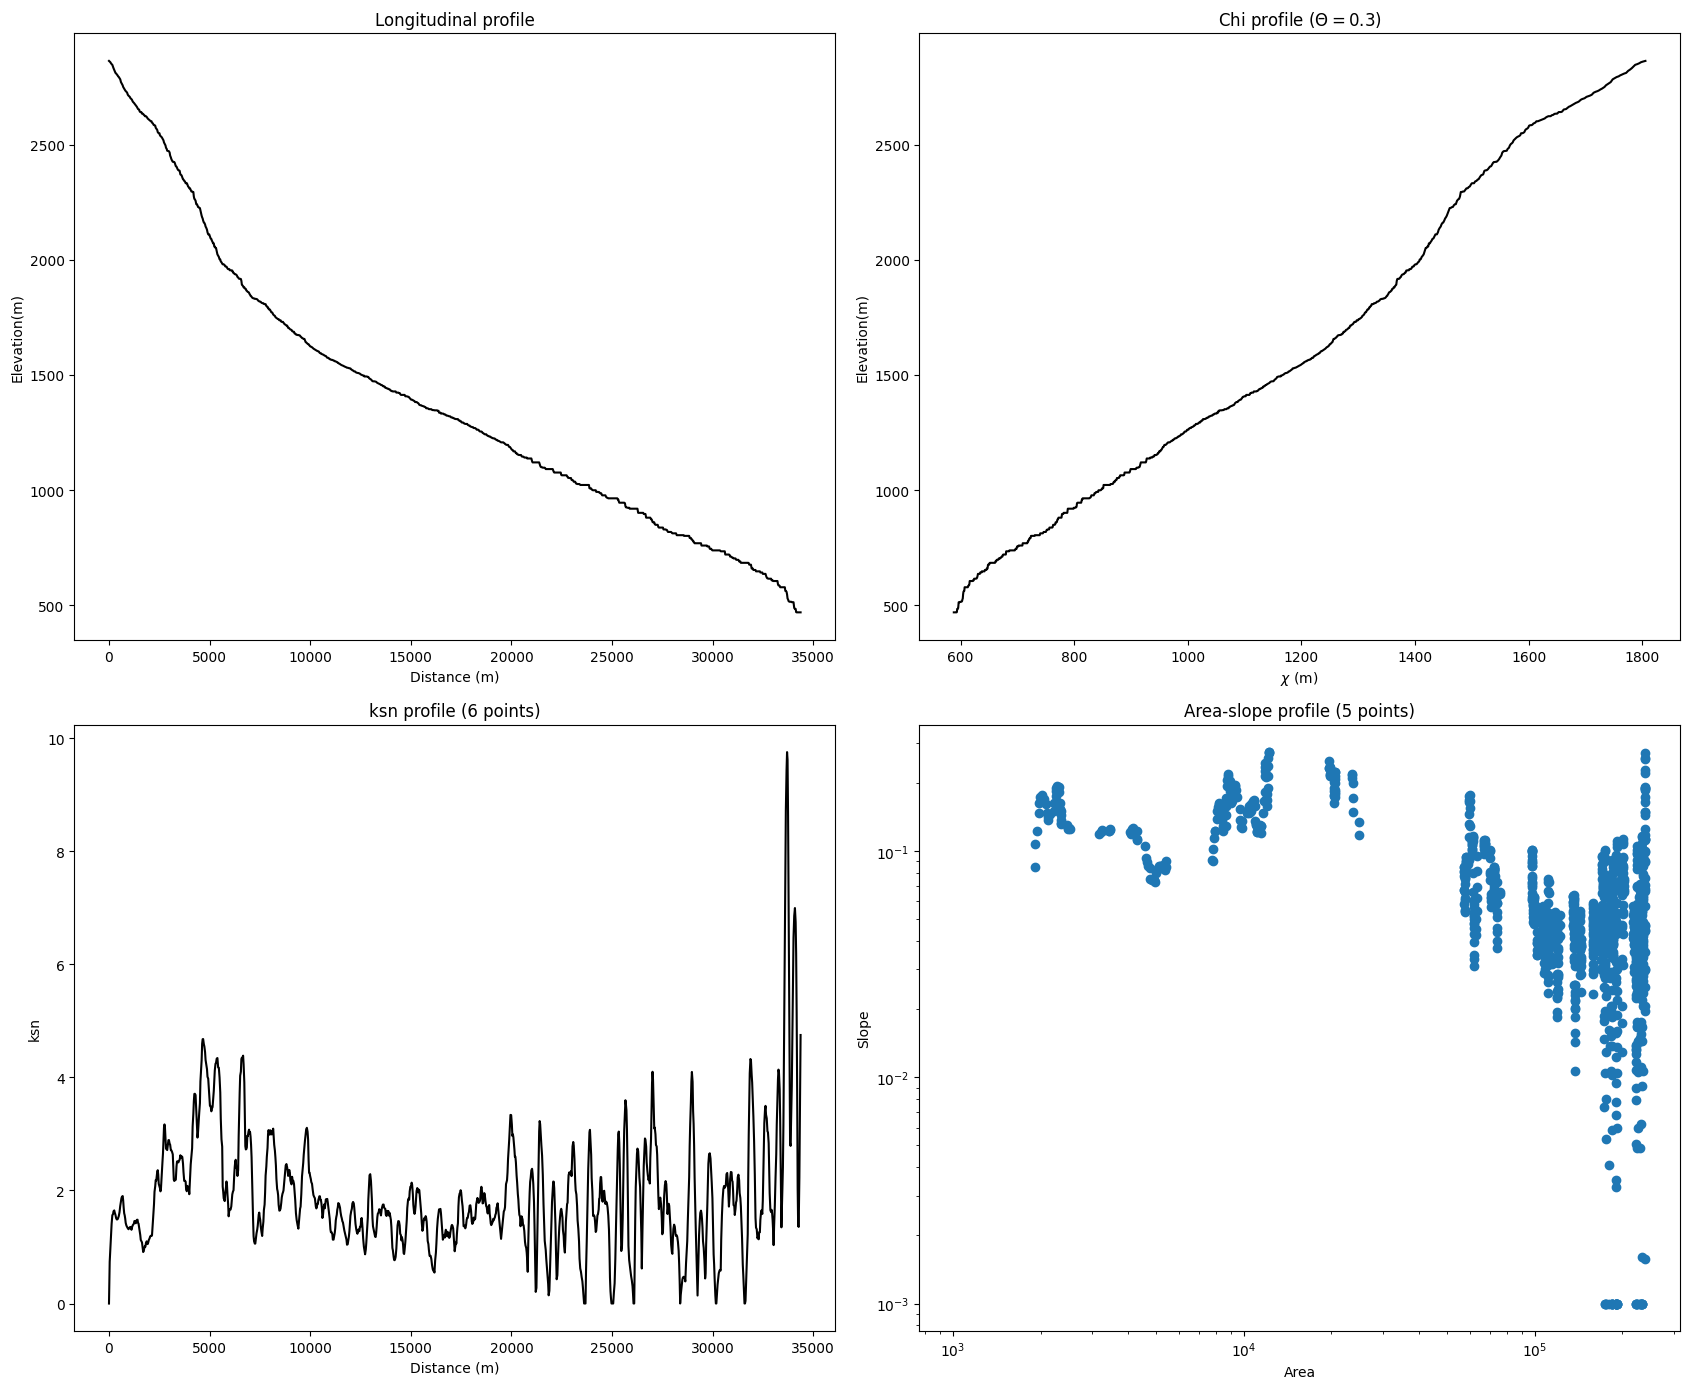

In [6]:
# Create different profiles with channel data
fig = plt.figure(figsize=(17, 14))

# Longitudinal profile
li = canal.getD()
zi = canal.getZ()
ax = fig.add_subplot(2,2,1)
ax.plot(li, zi, color="k")
ax.set_title("Longitudinal profile")
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Elevation(m)")

# Chi profile
chi = canal.getChi()
zi = canal.getZ()
ax = fig.add_subplot(2,2,2)
ax.plot(chi, zi, color="k")
ax.set_title("Chi profile ($\\Theta = ${})".format(canal._thetaref))
ax.set_xlabel("$\\chi$ (m)")
ax.set_ylabel("Elevation(m)")

# ksn profile
li = canal.getD()
ksn = canal.getKsn()
ax = fig.add_subplot(2,2,3)
ax.plot(li, ksn, color="k")
ax.set_title("ksn profile ({} points)".format(canal._ksn_np))
ax.set_xlabel("Distance (m)")
ax.set_ylabel("ksn")

# Logaritmic area-slope profile
a = canal.getA()
slp = canal.getSlope()
ax = fig.add_subplot(2,2,4)
ax.scatter(a, slp)
ax.set_title("Area-slope profile ({} points)".format(canal._slp_np))
ax.set_xlabel("Area")
ax.set_ylabel("Slope")
ax.set_xscale("log")
ax.set_yscale("log")

plt.tight_layout()

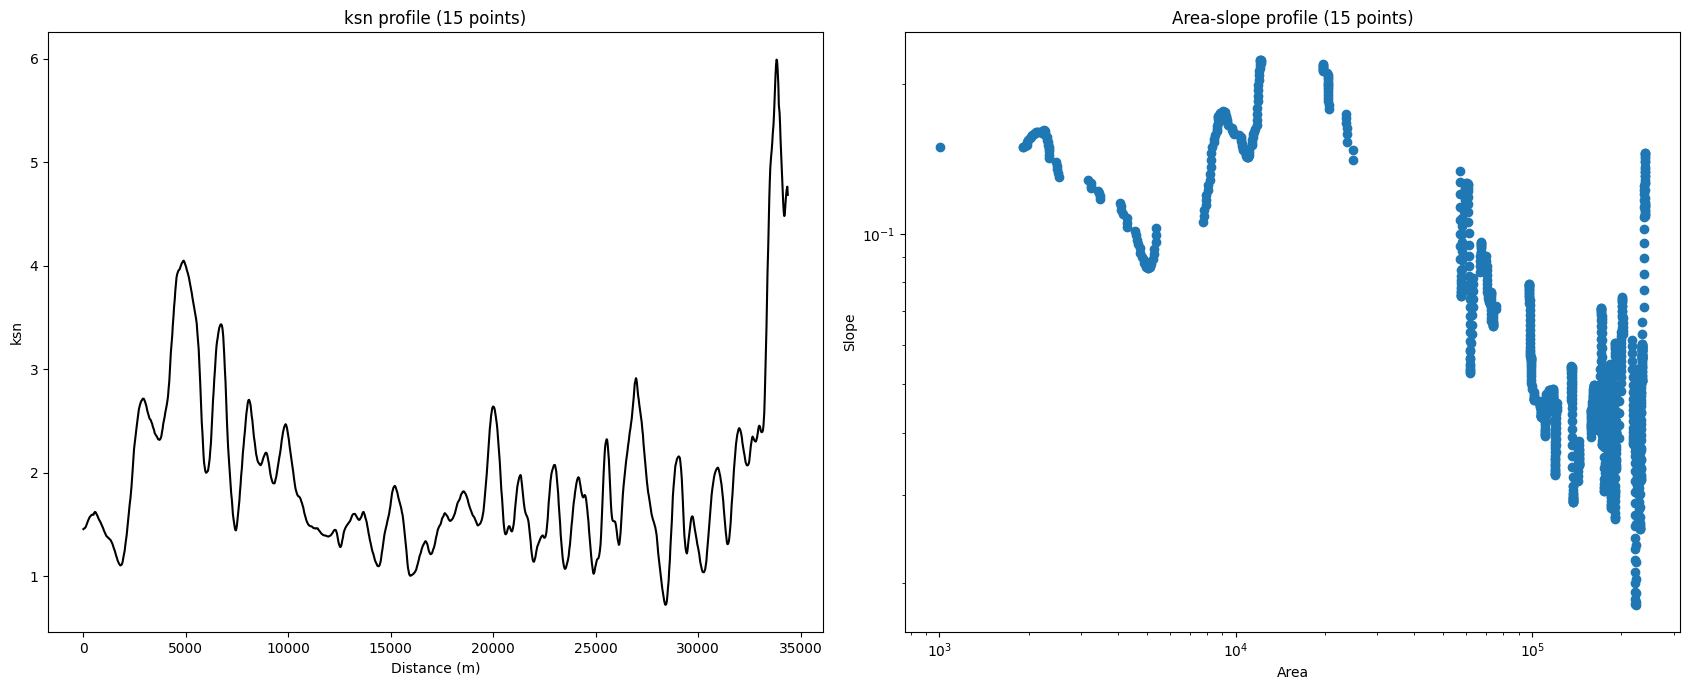

In [7]:
# Now we will smooth the profile and recalculate gradients (ksn - slope) with larger windows and plot both profiles
canal.smoothChannel(150, False) # False, Don't need to calculate gradients, because we will calculate them later
canal.calculateGradients(15, "ksn")
canal.calculateGradients(15, "slp")

fig = plt.figure(figsize=(17, 7))

# ksn profile
li = canal.getD()
ksn = canal.getKsn()
ax = fig.add_subplot(1,2,1)
ax.plot(li, ksn, color="k")
ax.set_title("ksn profile ({} points)".format(canal._ksn_np))
ax.set_xlabel("Distance (m)")
ax.set_ylabel("ksn")

# Logaritmic area-slope profile
a = canal.getA()
slp = canal.getSlope()
ax = fig.add_subplot(1,2,2)
ax.scatter(a, slp)
ax.set_title("Area-slope profile ({} points)".format(canal._slp_np))
ax.set_xlabel("Area")
ax.set_ylabel("Slope")
ax.set_xscale("log")
ax.set_yscale("log")

plt.tight_layout()